In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
# Caricamento del dataset
df = pd.read_csv("data/data.csv")

In [3]:
df.rename(columns={"Bankrupt?" : "Bancarotta",
                     " ROA(C) before interest and depreciation before interest" : "ROA(C) prima degli interessi e della svalutazione",
                     " ROA(A) before interest and % after tax" :"ROA(A) prima degli interessi e dopo le tasse",
                     " ROA(B) before interest and depreciation after tax" : "ROA(B) al lordo di interessi e ammortamenti dopo le imposte",
                     " Operating Gross Margin" : "Margine Lordo Operativo",
                     " Realized Sales Gross Margin" : "Margine Lordo sulle Vendite Effettive",
                     " Operating Profit Rate" : "Margine di Profitto Operativo",
                     " Pre-tax net Interest Rate" : "Aliquota di interesse netta ante imposte",
                     " After-tax net Interest Rate" : "Tasso di interesse netto dopo le tasse",
                     " Non-industry income and expenditure/revenue" : "Entrate e spese/redditività non legate all'industria",
                     " Continuous interest rate (after tax)" : "Tasso di interesse continuo (al netto delle imposte)",
                     " Operating Expense Rate" : "Tasso di Spesa Operativa",
                     " Research and development expense rate" : "Aliquota delle spese di ricerca e sviluppo",
                     " Cash flow rate" : "Tasso di flusso di cassa", 
                     " Interest-bearing debt interest rate" : "Aliquota degli interessi sul debito", 
                     " Tax rate (A)" : "Aliquota fiscale (A)", 
                     " Net Value Per Share (B)" : "Valore Netto per Azione (B)", 
                     " Net Value Per Share (A)" : "Valore Netto per Azione (A)", 
                     " Net Value Per Share (C)" : "Valore Netto per Azione (C)", 
                     " Persistent EPS in the Last Four Seasons" : "EPS persistente nelle ultime quattro stagioni", 
                     " Cash Flow Per Share" : "Flusso di cassa per azione", 
                     " Revenue Per Share (Yuan ¥)" : "Entrate per azione (Yuan ¥)", 
                     " Operating Profit Per Share (Yuan ¥)" : "Profitto Operativo per Azione (Yuan ¥)",
                     " Per Share Net profit before tax (Yuan ¥)" : "Profitto netto per azione prima delle tasse (Yuan ¥)", 
                     " Realized Sales Gross Profit Growth Rate" : "Tasso di crescita del margine lordo delle vendite", 
                     " Operating Profit Growth Rate" : "Tasso di crescita dell'utile operativo", 
                     " After-tax Net Profit Growth Rate" : "Tasso di crescita del profitto netto dopo le tasse", 
                     " Regular Net Profit Growth Rate" : "Aliquota crescita regolare del profitto netto", 
                     " Continuous Net Profit Growth Rate" : "Tasso di crescita continua del profitto netto", 
                     " Total Asset Growth Rate" : "Tasso di crescita totale degli asset", 
                     " Net Value Growth Rate" : "Tasso crescita valore netto",
                     " Total Asset Return Growth Rate Ratio" : "Tasso di crescita del rendimento totale degli asset ",
                     " Cash Reinvestment %" : "Percentuale di reinvestimento del contante", 
                     " Current Ratio" : "Rapporto Corrente", 
                     " Quick Ratio" : "Rapporto Rapido", 
                     " Interest Expense Ratio" : "Rapporto Spese Interesse", 
                     " Total debt/Total net worth" : "Debito totale/ Patrimonio netto totale", 
                     " Debt ratio %" : "Rapporto debito %", 
                     " Net worth/Assets" : "Patrimonio netto/Attività", 
                     " Long-term fund suitability ratio (A)" : "Livello di idoneità dei fondi a lungo termine (A)", 
                     " Borrowing dependency" : "Indebitamento da prestiti", 
                     " Contingent liabilities/Net worth" : "Crediti in sospeso/Patrimonio netto", 
                     " Operating profit/Paid-in capital" : "Profitto operativo su capitale versato", 
                     " Net profit before tax/Paid-in capital" : "Profitto netto prima delle imposte / Capitale sociale versato", 
                     " Inventory and accounts receivable/Net value" : "Inventario e crediti commerciali/Valore netto", 
                     " Total Asset Turnover" : "Rotazione totale degli asset", 
                     " Accounts Receivable Turnover" : "Rotazione dei crediti", 
                     " Average Collection Days" : "Giorni medi di incasso", 
                     " Inventory Turnover Rate (times)" : "Rotazione dell'inventario (volte)", 
                     " Fixed Assets Turnover Frequency" : "Frequenza del turnover degli asset fissi", 
                     " Net Worth Turnover Rate (times)" :  "Net Worth Turnover Rate (times)", 
                     " Revenue per person" : "Entrate per persona", 
                     " Operating profit per person" : "Profitto operativo per persona", 
                     " Allocation rate per person" : "Tariffa di allocazione per persona", 
                     " Working Capital to Total Assets" : "Capitale circolante su attivo totale", 
                     " Quick Assets/Total Assets" : "Attività rapide/Attività totali", 
                     " Current Assets/Total Assets" : "Attività correnti/Attività totali", 
                     " Cash/Total Assets" : "Cassa/Attività Totali", 
                     " Quick Assets/Current Liability" : "Attività rapide su passività corrente", 
                     " Cash/Current Liability" : "Cassa/Passività correnti", 
                     " Current Liability to Assets" : "Passività correnti su attività", 
                     " Operating Funds to Liability" : "Rapporto tra Fondi Operativi e Passività", 
                     " Inventory/Working Capital" : "Inventario/Capitale circolante", 
                     " Inventory/Current Liability" : "Inventario/Passività corrente", 
                     " Current Liabilities/Liability" : "Correnti Passività/Passivo", 
                     " Working Capital/Equity" : "Capitale circolante/patrimonio netto", 
                     " Current Liabilities/Equity" : "Passività correnti su patrimonio netto", 
                     " Long-term Liability to Current Assets" : "Debito a lungo termine su attività correnti", 
                     " Retained Earnings to Total Assets" : "Riserve utili su attivo totale", 
                     " Total income/Total expense" : "Reddito totale/Spese totali", 
                     " Total expense/Assets" : "Spese totali/Attività", 
                     " Current Asset Turnover Rate" : "Indice di Rotazione dell'Attivo Corrente", 
                     " Quick Asset Turnover Rate" : "Velocità di rotazione rapida degli asset", 
                     " Working capitcal Turnover Rate" : "Rapporto di rotazione del capitale circolante", 
                     " Cash Turnover Rate" : "Velocità di Rotazione del Contante", 
                     " Cash Flow to Sales" : "Flusso di cassa su vendite", 
                     " Fixed Assets to Assets" : "Attivi fissi su attivi", 
                     " Current Liability to Liability" : "Rapporto attuale di passività", 
                     " Current Liability to Equity" : "Passività corrente su patrimonio netto", 
                     " Equity to Long-term Liability" : "Rap. Patrimonio a Passività a Lungo Term.", 
                     " Cash Flow to Total Assets" : "Cash Flow su Attività Totali",
                     " Cash Flow to Liability" : "Flusso di cassa sulle passività",
                     " CFO to Assets" : "Rapporto CFO su Attività", 
                     " Cash Flow to Equity" : "Flusso di cassa verso il patrimonio netto", 
                     " Current Liability to Current Assets" : "Rapporto Passività Correnti su Attività Correnti", 
                     " Liability-Assets Flag" : "Indicatore Passività-Attività", 
                     " Net Income to Total Assets" : "Redditività sull'Attivo Totale (NITA)", 
                     " Total assets to GNP price" : "Totale attività rispetto al prezzo PNL", 
                     " No-credit Interval" : "Intervallo senza credito", 
                     " Gross Profit to Sales" : "Utile lordo sulle vendite",
                     " Net Income to Stockholder's Equity" : "Utile netto/patrimonio netto", 
                     " Liability to Equity" : "Responsabilità verso il patrimonio netto", 
                     " Degree of Financial Leverage (DFL)" : "Grado di leva finanziaria (DFL)", 
                     " Interest Coverage Ratio (Interest expense to EBIT)" : "Rapp. di copertura degli interessi (interessi passivi/EBIT)", 
                     " Net Income Flag" : "Indicatore di Reddito Netto", 
                     " Equity to Liability" : "Capitale proprio/Passività"}, inplace = True)

In [4]:
# Isolare le variabili indipendenti e la variabile target
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Bancarotta'])
y = df['Bancarotta']



In [5]:
# Suddivisione del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [6]:
# Standardizzazione dei dati
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)  # Fit e trasformazione del training set
X_test_standardized = scaler.transform(X_test)       # Solo trasformazione del test set

In [7]:
# PCA sul training set
pca = PCA()
X_train_pca = pca.fit_transform(X_train_standardized)

# Trasformazione del test set con lo stesso modello PCA
X_test_pca = pca.transform(X_test_standardized)

# Determina il numero di componenti che spiegano il 75% della varianza
explained_variance_threshold = 0.75
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
index_selected = np.argmax(cum_sum_eigenvalues >= explained_variance_threshold) + 1



In [8]:
# Recupera i pesi delle componenti principali
principal_components = pca.components_
columns = X.columns  # Nomi delle variabili originali

# Numero di feature da selezionare per ogni componente
top_n_features = 5

# Dizionario per memorizzare le feature selezionate per ciascuna componente principale
selected_features = {}

for i, component in enumerate(principal_components):
    # Ordina le variabili in base al peso assoluto nella componente principale
    sorted_idx = np.argsort(np.abs(component))[::-1]  # Indici ordinati per valore assoluto decrescente
    top_features = [columns[j] for j in sorted_idx[:top_n_features]]  # Prendi le top N feature
    selected_features[f"Componente Principale {i+1}"] = top_features

# Stampa le feature selezionate per ciascuna componente principale
for component, features in selected_features.items():
    print(f"{component}: {features}")


Componente Principale 1: ['EPS persistente nelle ultime quattro stagioni', 'ROA(C) prima degli interessi e della svalutazione', 'ROA(A) prima degli interessi e dopo le tasse', 'ROA(B) al lordo di interessi e ammortamenti dopo le imposte', 'Profitto netto per azione prima delle tasse (Yuan ¥)']
Componente Principale 2: ['Passività corrente su patrimonio netto', 'Passività correnti su patrimonio netto', 'Responsabilità verso il patrimonio netto', 'Indebitamento da prestiti', 'Inventario e crediti commerciali/Valore netto']
Componente Principale 3: ['Margine di Profitto Operativo', 'Rapporto di rotazione del capitale circolante', 'Tasso di interesse continuo (al netto delle imposte)', 'Aliquota di interesse netta ante imposte', 'Tasso di interesse netto dopo le tasse']
Componente Principale 4: ['Capitale circolante/patrimonio netto', 'Passività correnti su attività', 'Attività correnti/Attività totali', 'Rotazione totale degli asset', 'Crediti in sospeso/Patrimonio netto']
Componente Prin

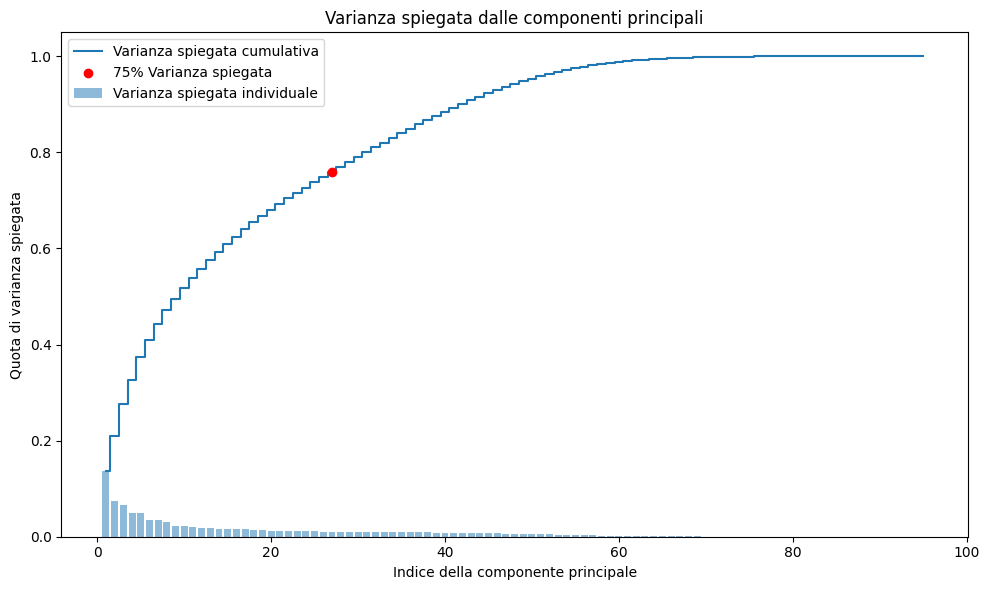

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Calcolo della varianza spiegata cumulativa
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Indice della componente che raggiunge il 75% di varianza
index_selected = np.argmax(cum_explained_variance >= 0.75) + 1

# Plotting explained variance with a red dot at the 75% threshold
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_, alpha=0.5, label='Varianza spiegata individuale')
plt.step(range(1, len(cum_explained_variance) + 1), 
         cum_explained_variance, where='mid', label='Varianza spiegata cumulativa')

# Mark the 75% variance threshold
plt.scatter(index_selected, cum_explained_variance[index_selected - 1], color='red', label='75% Varianza spiegata', zorder=5)

# Add labels and legend
plt.xlabel('Indice della componente principale')
plt.ylabel('Quota di varianza spiegata')
plt.title('Varianza spiegata dalle componenti principali')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [10]:
# Riduzione dei set di training e test alle componenti selezionate
X_train_reduced = X_train_pca[:, :index_selected]
X_test_reduced = X_test_pca[:, :index_selected]

# Modello di regressione logistica
model = LogisticRegression()
model.fit(X_train_reduced, y_train)

# Predizione e accuratezza
y_pred = model.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza del modello: {accuracy}")

Accuratezza del modello: 0.9633431085043989
